![title](./images/logo_nao_digital.png)

# Tema 2. Conceptos de estadística y probabilidad usando Python

## 1. Objetivo

Ahora que se ha integrado la data de Olist, el equipo de `Brasil BI Consulting` puede analizar de los retrazos las órdenes de los cliente, así el objetivo de esta sección será comenzar dicho análisis incorporando elementos de estadística y probabilidad usando Python.

## 2. Librerías de trabajo

In [2]:
# Instala libreria si no la tenemos
!pip install pandas -y
!pip install openpyxl -y
!pip install matplotlib.pyplot -y
!pip install pillow


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -

In [3]:
import os
import numpy as np
import pandas as pd
import openpyxl

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 3. Lectura de datos

 Leeremos los datos, indicando a Python donde se encuentra la carpeta que se aloja los datos y los nombres de los archivos relevantes para el análisis.

In [4]:
# Primero indicamos la ruta a la carpeta de de tu computadora 
# donde se ubican los datos del E-commerce
# Ejemplo: "C:\Usuarios\[tu nombre]\Descargas"

DATA_PATH="C:\\Users\\Natalia\\Recursos DN_COM_58"

También usaremos el archivo consolidado de la lectura anterior:

In [5]:
FILE_CONSOLIDATED_DATA = 'oilst_processed.csv'

Recordemos que algunas de las columnas que contienen fechas deben ser convertidas al formato correspondiente, lo cual se puede llevar a cabo de forma automática usando el parámetro de `parse_dates`:

In [6]:
# Lista de columnas a interpretar como fecha
columns_dates=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

# Lectura del archivo csv
oilst = pd.read_csv(
    os.path.join(DATA_PATH, FILE_CONSOLIDATED_DATA),
    parse_dates=columns_dates
    )

## 4. Análisis Exploratorio De Datos

### 4.1 Generalidades sobre la tabla

Nuevamente podemos ver la información de la tabla con el comando `.info`

In [7]:
oilst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   distance_distribution_center   96470 non-null  float64       
 9   year                           99441 non-null  int64         
 10  month                          99441 non-null  int64         
 11  quarter        

Podemos revisar las columnas de nuestra tabla el comando `.columns`, que devuelve las columnas como un array:

In [8]:
oilst.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'distance_distribution_center', 'year', 'month', 'quarter',
       'year_month', 'delta_days', 'delay_status', 'total_products',
       'total_sales', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'abbreviation', 'state_name'],
      dtype='object')

**Pregunta:**

* ¿Cuantas columnas tiene la tabla?

La tabla tiene 28 columnas

* ¿Cuánto espacio ocupa en memoria?

Ocupa 21.2+ MB

### 4.2 Explorando columnas

#### 4.2.1 Una sola columna

Las columnas individuales de un dataframe de Pandas se pueden acceder de dos formas distintas: 1) usando el nombre la columna con corchetes después del nombre de dataframe, es decir `oilst['nombre_columna']` , 2) o bien, separando el nombre del dataframe y su columna por un punto `oilst.nombre_columna`. Como se puede ver a continuación:

In [9]:
oilst['total_sales']

0         29.99
1        118.70
2        159.90
3         45.00
4         19.90
          ...  
99436     72.00
99437    174.90
99438    205.99
99439    359.98
99440     68.50
Name: total_sales, Length: 99441, dtype: float64

In [10]:
oilst.total_sales

0         29.99
1        118.70
2        159.90
3         45.00
4         19.90
          ...  
99436     72.00
99437    174.90
99438    205.99
99439    359.98
99440     68.50
Name: total_sales, Length: 99441, dtype: float64

En ambos casos se pueden realizar operaciones con ellas como arreglos tradicionales de Python. Es decir con sumas, restas, multiplicaciones y divisiones. Por ejemplo,se puede expresar las ventas en miles:

In [11]:
# Ventas expresadas en miles
oilst['total_sales']/1000

0        0.02999
1        0.11870
2        0.15990
3        0.04500
4        0.01990
          ...   
99436    0.07200
99437    0.17490
99438    0.20599
99439    0.35998
99440    0.06850
Name: total_sales, Length: 99441, dtype: float64

Además se pueden aplicar operaciones sobre las columnas, con los operadores `.sum, .mean, .std, .min, .max` y muchos más. Por ejemplo, la siguiente operación calcula la cantidad total de ventas de Oislt millones:

In [12]:
oilst['total_sales'].sum()/1000000

13.5916437

Otro operador de interés es `.unique`, pues permite entender cuales son los valores únicos presentes en una columna. Con éste, podemos saber cuales son todos los estatus de las órdenes que el equipo de ingeniería de datos del e-commerce nos dió.

In [13]:
oilst['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

A su vez, el operador `.value_counts()` nos permite contar cuantas veces aparecen estos valores en cada categoría presente en cada columna:

In [14]:
oilst['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Preguntas***

* ¿Porqué deberíamos centrar el análisis de las órdenes con retraso en la categoría `delivered`?

Porque la idea es identificar patrones de comportamiento en las órdenes que están represadas y no han llegado a tiempo, además que son la mayor parte de la muestra.

* ¿Qué sucedería si incluyeramos órdenes con estatus distintos, por ejemplo, `processing` o `shipped`?

Estaríamos atribuyendo retrasos a las órdenes que de alguna manera ya fueron gestionadas o no han entrado en la línea de despachos.

* ¿Qué hace el operador `.value_counts(normalize=True)` sobre la columna `oilst['order_status']`?

Este operador se utiliza para contar y normalizar los valores únicos en una columna de un DataFrame en Pandas. En este contexto, estamos aplicando esta función a la columna olist['order_status'] para contar y normalizar los valores de estado de los pedidos en un conjunto de datos.

In [15]:
oilst['order_status'].value_counts(normalize=True)

order_status
delivered      0.970203
shipped        0.011132
canceled       0.006285
unavailable    0.006124
invoiced       0.003158
processing     0.003027
created        0.000050
approved       0.000020
Name: proportion, dtype: float64

#### 4.2.2 Varias columnas

En complemento, Pandas también permite seleccionar varias columnas a la vez para llevar a cabo el análisis multivariado.

Esencialmente, se pueden acceder de dos formas distintas: 1) usando una lista con los nombres de las columnas de nuestro interñes después del nombre de dataframe, es decir `oilst[['columna_1', 'columna_2', ..., 'columna_10']` , 2) o bien, usando el método `filter`, como sigue:

In [16]:
oilst[['total_sales','total_products']]

,total_sales,total_products
0,29.99,1.0
1,118.70,1.0
2,159.90,1.0
3,45.00,1.0
4,19.90,1.0
...,...,...
99436,72.00,1.0
99437,174.90,1.0
99438,205.99,1.0
99439,359.98,2.0


In [17]:
oilst.filter(['total_sales','total_products'])

,total_sales,total_products
0,29.99,1.0
1,118.70,1.0
2,159.90,1.0
3,45.00,1.0
4,19.90,1.0
...,...,...
99436,72.00,1.0
99437,174.90,1.0
99438,205.99,1.0
99439,359.98,2.0


En ambos casos, se pueden usar los operadores que hemos visto, por ejemplo para calcular el promedio de ventas y productos en las órdenes:

In [18]:
oilst[['total_sales','total_products']].mean()

total_sales       137.754076
total_products      1.141731
dtype: float64

**Pregunta:**

* ¿Cómo podemos interpretar el promedio de la variable `total_products`?,

Nos indica que la media promedio que lleva un cliente es 1 producto, equivalente a una suscripción.

* Lo anterior, ¿dice algo respecto a la cantidad de productos que suelen llevar los clientes en una compra?

Sí, esto es lo que se conoce como *Ticket promedio* por transacción realizada.

* ¿Qué se puede apreciar sobre la cantidad de productos  que la gente compra si aplicamos el método `.describe` a `oilst[['total_sales','total_products']]`?

Podemos observar que hasta el Q3(75% de la población de la muestra) las ventas son de 1 unidad por cliente.

In [19]:
#oilst[['total_sales','total_products']].describe()
oilst[['total_sales','total_products']].describe()

,total_sales,total_products
count,98666.000000,98666.000000
mean,137.754076,1.141731
std,210.645145,0.538452
min,0.850000,1.000000
25%,45.900000,1.000000
50%,86.900000,1.000000
75%,149.900000,1.000000
max,13440.000000,21.000000


Cabe destacar que los operadores `.min` y `.max` también pueden trabajar con fechas, por ejemplo nos sirven para conocer los valores mínimo y máximo de las fechas de las órdenes:

In [20]:
print("Primera fecha: ", oilst['order_purchase_timestamp'].min())

Primera fecha:  2016-09-04 21:15:19


In [21]:
print("Última fecha: ", oilst['order_purchase_timestamp'].max())

Última fecha:  2018-10-17 17:30:18


Estos también los podemos conocer con `.describe`

In [22]:
# Condicion  lógica para filtrar (solo ordenes entregadas)
delivered_filter = "order_status  == 'delivered' "

delivered = oilst.query(delivered_filter)

delivered['order_purchase_timestamp'].describe()

count                            96478
mean     2018-01-01 23:29:31.939913984
min                2016-09-15 12:16:38
25%      2017-09-14 09:00:23.249999872
50%                2018-01-20 19:45:45
75%                2018-05-05 18:54:47
max                2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

## 4.3 Filtrando subconjuntos de datos

En ocasiones, es necesario estudiar sólo una parte de todos los datos proporcionados. Pandas permite realizar estos filtros en los datos en varias formas (https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/), por ejemplo con valores de una columna, estructura lógicas para comparar fechas, entre otros.

En este análisis únicamente nos interesarán las órdenes completadas, así que tenemos que obtener el subconjunto de datos correspondiente. La utilidad de pandas que no servirá para dicho propósito es `.query()` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html). En su interior debemos espeficar como texto una cadena lógica que indique que valor de una columna queremos obtener (`"order_status  == 'delivered' "`)

In [23]:
# Condicion  lógica para filtrar (solo ordenes entregadas)
delivered_filter = "order_status  == 'delivered' "

delivered = oilst.query(delivered_filter)

Ahora podemos ver una muestra de este nuevo subconjunto de datos:

In [24]:
delivered.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
41340,41efbbf74c4dc9530e8ab1e0c3f947c0,98ebf1c15712e7bc455d7cf9130f3f62,delivered,2017-11-14 01:44:33,2017-11-14 01:55:23,2017-11-14 18:49:56,2017-11-16 21:24:38,2017-11-28,51.77,2017,...,9751,sao bernardo do campo,SP,9751.0,-23.693028,-46.546954,sao bernardo do campo,SP,SP,São Paulo
40234,5a9a959af722c04f7691c01c88736170,d7a16ce504fdfcb4c96e8bd0a8ff1a98,delivered,2018-01-08 11:01:30,2018-01-09 07:24:03,2018-01-10 12:35:34,2018-01-15 19:15:09,2018-01-31,12.01,2018,...,13026,campinas,SP,13026.0,-22.913757,-47.045574,campinas,SP,SP,São Paulo
59205,576b3b33dc81c4368f8256613418a197,74d42649584dc3dca22a3f1f27232c53,delivered,2018-05-26 12:04:00,2018-05-26 12:30:13,2018-05-28 11:18:00,2018-06-22 19:32:01,2018-07-19,57.43,2018,...,66640,belem,PA,66640.0,-1.380973,-48.451962,belem,PA,PA,Pará
85012,7b53d37cd3cdc55e289fe498a1f22b01,cb40f963a5e723ee4d756e4e68935006,delivered,2018-03-25 10:15:15,2018-03-25 10:27:29,2018-03-27 18:42:54,2018-04-02 20:46:30,2018-04-13,19.24,2018,...,31812,belo horizonte,MG,31812.0,-19.850250,-43.931656,belo horizonte,MG,MG,Minas Gerais
17181,ba874dd7cf834e16c5bbf9c2c1b4eee7,2c68daca346558266eee9bf9539b7f24,delivered,2018-02-21 10:40:03,2018-02-21 12:27:50,2018-02-22 23:18:52,2018-03-12 20:48:25,2018-03-15,93.57,2018,...,79310,corumba,MS,79310.0,-19.011423,-57.627198,corumba,MS,MS,MatoGrosso do Sul


La cantidad de renglones y columnas totales en este dataframe se puede obtener con el método `.shape`

In [25]:
delivered.shape

(96478, 28)

Este método es bastante amigable pues nos permite añadir muchas condiconales lógicas en el análisis en una misma expresión. Por ejemplo, si queremos el conjunto cantidad de ordenes que llegaron con retrazo prolongado y cuya venta represento más de 50 unidades monetarias esto se calcula como:

In [26]:
delivered.query("delay_status == 'long_delay'  & total_sales > 50").head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,341.26,2017,...,4001,sao paulo,SP,4001.0,-23.572301,-46.652000,sao paulo,SP,SP,São Paulo
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,196.23,2018,...,21715,rio de janeiro,RJ,21715.0,-22.878152,-43.444643,rio de janeiro,RJ,RJ,Rio de Janeiro
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,96.24,2017,...,19400,presidente venceslau,SP,19400.0,-21.881549,-51.846219,presidente venceslau,SP,SP,São Paulo
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13 18:14:36,2017-03-13 18:14:36,2017-03-22 14:03:09,2017-04-06 13:37:16,2017-03-30,88.40,2017,...,13068,campinas,SP,13068.0,-22.865111,-47.152559,campinas,SP,SP,São Paulo
97,6a0a8bfbbe700284feb0845d95e0867f,68451b39b1314302c08c65a29f1140fc,delivered,2017-11-22 11:32:22,2017-11-22 11:46:50,2017-11-27 13:39:35,2017-12-28 19:43:00,2017-12-11,1133.10,2017,...,20740,rio de janeiro,RJ,20740.0,-22.896035,-43.321577,rio de janeiro,RJ,RJ,Rio de Janeiro


**Preguntas:**

* ¿Cuantas órdenes completadas llegaron en tiempo (`delay_status` igual a `on_time`), con al menos 3 productos y con valor de ventas de más de 100 unidades monetarias?

720 órdenes

In [27]:
# delivered.query("delay_status == 'on_time'  & total_sales > 100 & total_products > 3")
delivered.query("delay_status == 'on_time'  & total_sales > 100 & total_products > 3")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,distance_distribution_center,year,...,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,abbreviation,state_name
67,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,delivered,2018-06-18 16:02:23,2018-06-18 17:00:57,2018-06-19 15:55:00,2018-06-22 21:18:51,2018-07-13,11.19,2018,...,8220,sao paulo,SP,8220.0,-23.536398,-46.459557,sao paulo,SP,SP,São Paulo
74,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-04-24 09:34:13,2017-05-10 09:17:55,2017-05-12,3.20,2017,...,85804,cascavel,PR,85804.0,-24.984995,-53.477758,cascavel,PR,PR,Paraná
147,90349f264a3d6a2525a34598d09dda6b,d19f254a07da73a055409256e9bfe40a,delivered,2018-05-11 16:35:19,2018-05-12 03:32:26,2018-05-14 15:16:00,2018-05-15 18:38:39,2018-05-21,38.75,2018,...,13478,americana,SP,13478.0,-22.737278,-47.312670,americana,SP,SP,São Paulo
306,f04bfdbef5359607d39e66fccc9cc0de,ddbd5d378c4a0981ba1ef29fb8e40b8f,delivered,2017-09-13 15:07:45,2017-09-13 15:25:15,2017-09-14 19:27:47,2017-09-22 16:48:51,2017-10-04,83.56,2017,...,75533,itumbiara,GO,75533.0,-18.400125,-49.279649,itumbiara,GO,GO,Goiás
464,8adafb3466daa5395694d3a906ff9d40,b7919647bde69acc948baa47823d6c75,delivered,2017-01-25 15:47:27,2017-01-25 16:02:29,2017-02-07 08:09:23,2017-02-14 14:03:35,2017-03-23,49.84,2017,...,14740,viradouro,SP,14740.0,-20.876728,-48.295572,viradouro,SP,SP,São Paulo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99142,7b598857cddf46a156640f69f70a6e6d,a215ee5514ab937a137a58f476f4ec71,delivered,2018-07-25 01:12:50,2018-07-25 01:25:07,2018-08-02 12:44:00,2018-08-09 22:58:38,2018-08-24,82.96,2018,...,7070,guarulhos,SP,7070.0,-23.451798,-46.553901,guarulhos,SP,SP,São Paulo
99307,58edf3f5f282ab91e0f6a6f2b85af02a,14945bc802d49b0f9f68f2ea8fd060c4,delivered,2018-05-07 09:01:58,2018-05-08 04:34:10,2018-05-10 12:35:00,2018-05-14 18:52:56,2018-05-30,70.09,2018,...,88370,navegantes,SC,88370.0,-26.886907,-48.662147,navegantes,SC,SC,Santa Catarina
99310,a483ffe0ce133740ab12ebcba8a3ccf9,e2f063c52fa92b54f186c62b90699c10,delivered,2018-01-10 14:16:10,2018-01-10 14:29:14,2018-01-13 00:47:56,2018-01-19 10:16:08,2018-01-31,35.01,2018,...,14640,morro agudo,SP,14640.0,-20.739069,-48.063899,morro agudo,SP,SP,São Paulo
99312,f930a1f6247ed00d6fa9d8a09782c7b4,4ab4db2f93c68d5914dc5eb566dc486c,delivered,2018-06-05 12:28:11,2018-06-05 14:31:34,2018-06-06 13:12:00,2018-06-07 17:28:31,2018-07-11,37.81,2018,...,13035,campinas,SP,13035.0,-22.909953,-47.081851,campinas,SP,SP,São Paulo


## 4.4 Trabajando con variables categóricas

En estadística, una variable categórica es una variable que denota representa una categoría que califica a algo del mundo real, por ejemplo palabras o frases que describen una característica o cualidad específica, como el color de ojos (azul, verde, marrón) o la marca de automóvil (Toyota, Ford, Honda).

Pandas tiene métodos especiales para realizar cálculos de conteos y proporciones que cada categoría representa con respecto al total.

Por ejemplo, `.value_counts()` nos permite contar cuantos elementos de cada categoría existen en los tipos de entrega que se observaron respecto a la existencia de retrasos en las órdenes:

In [28]:
delivered['delay_status'].value_counts()

delay_status
on_time        88644
long_delay      5164
short_delay     2670
Name: count, dtype: int64

Además el parámetro `normalize=True` permite calcular lo anterior, como proporciones del total:

In [29]:
delivered['delay_status'].value_counts(normalize=True)

delay_status
on_time        0.918800
long_delay     0.053525
short_delay    0.027675
Name: proportion, dtype: float64

Aquí, se desprende que casi el 92% de las órdenes llegaron en tiempo, lo cual es un gran parámetro de la calidad de servicio del e-commerce Olist. Además, en el umbral de retrasos aceptables (hasta 3 días después de lo estimado) se encuentran el 2.76% de las órdenes.

Sin embargo, casi 5% de las órdenes tiene retrasos prolongados, es decir, los reportes de las redes sociales derivan de personas en este segmento específico.

**Preguntas**

* ¿Cómo podriamos comunicar lo anterior como un el área de oportunidad para Oilst?

Comunicar los resultados mencionados como un área de oportunidad para Olist podría implicar destacar la calidad del servicio en términos de entregas *on_time* y poner énfasis en la necesidad de abordar y mejorar el manejo de las órdenes con *long_delay*, más o menos así:

* Se comienza resaltando el éxito y la calidad del servicio que Olist ha logrado. Mencionando que aproximadamente el 92% de las órdenes se entregan puntualmente, lo que es un logro significativo en términos de satisfacción del cliente y eficiencia operativa.

* Luego, se identifica un desafío u oportunidad de mejora para alrededor del 5% de las órdenes experimentan que retrasos prolongados. Este segmento específico de órdenes representa una preocupación y puede ser la fuente de los informes negativos en las redes sociales.

* Adquirir un compromiso de mejoramiento para abordar este desafío y mejorar aún más la calidad del servicio. Esto puede incluir inversiones en logística especificamente en Sao Paulo, procesos de gestión de pedidos y atención al cliente. Esto podría incluir mejoras en la gestión de inventario, optimización de rutas de entrega y una comunicación más efectiva con los clientes en caso de retrasos.

* Incorporar a los clientes dentro del proceso, para que hagan participación activa con su retroalimentación con asuntos como calificar su experiencia y comunicar cualquier problema que puedan haber enfrentado. Este proceso debe complementarse con un acompañamiento por parte de Olist, que debe estar dispuesto para escuchar y responder antes las preocupaciones de los clientes.

* Hacer un seguimiento trasparente y comunicar los avances realizados en la mejora de los tiempos de entrega y la satisfacción del cliente. La comunicación efectiva sobre los desafíos y las áreas de oportunidad demuestra la transparencia y la voluntad de una empresa para abordar problemas y mejorar la experiencia del cliente. También puede ayudar a ganar la confianza de los clientes y a mantener una relación positiva con ellos.

## 4.5 Trabajando con variables numéricas y categóricas

Cómo hemos visto antes, Pandas posee una serie de métodos (`.min, .max, .mean, .std, .median, .sum, .count`) para operar sobre variables numéricas. Estas se pueden combinar con agrupaciones sobre variables categóricas para observar como cambian las variables dentro de grupos específicos.

Para ello, Pandas ofrece al operador `.groupby()` que permite realizar operaciones agregadas en sobres los valores de una variable categóricas. A continuación, calcularemos el promedio de la diferencia de dias entre la entrega estimada y la fecha real de entrega, por cada los elementos de `delay_status`:

In [30]:
delivered.groupby(['delay_status'])['delta_days'].mean()


delay_status
long_delay     13.752796
on_time       -13.008280
short_delay     1.402238
Name: delta_days, dtype: float64

Aquí podemos apreciar que en el caso de órdenes a tiempo, estas llegan en promedio 13 días antes de lo proyectado. En el caso de las órdenes con retraso moderado, tales llegan posteriormente en 1 día después de la fecha estimada

**Pregunta**

* ¿Cómo se puede interpretar el promedio de `delta_days` para las órdenes con retrasos prolongados?

Un valor positivo de una unidad significa que, en promedio, las órdenes con retrasos prolongados llegan 13 días después de la fecha estimada de entrega. Existe retraso muy alto. 

* ¿Cuál es el área de oportunidad que tiene el e-commerce con respecto a dicho promedio?

Para lograrlo, el e-commerce podría considerar las siguientes acciones:

* Mejorar la Logística: Evaluar y optimizar los procesos logísticos, incluyendo la gestión de inventario, las rutas de entrega y la eficiencia operativa para reducir los retrasos.

* Comunicación Proactiva: Implementar una comunicación proactiva con los clientes en caso de retrasos, brindando información actualizada sobre el estado de sus órdenes y proporcionando expectativas realistas de entrega.

* Gestión de Inventarios: Asegurarse de mantener un inventario adecuado y prever los posibles problemas de abastecimiento que puedan llevar a retrasos en las entregas.

* Seguimiento y Análisis: Realizar un seguimiento constante de las órdenes con retrasos prolongados y analizar las causas subyacentes de los retrasos para abordarlos de manera efectiva.

* Capacitación del Personal: Brindar capacitación a los empleados involucrados en la gestión y entrega de órdenes para mejorar la eficiencia y la calidad del servicio.

El objetivo es reducir el promedio de delta_days para las órdenes con retrasos prolongados, lo que mejorará la experiencia del cliente y la percepción de la calidad del servicio.

De la misma forma, se pueden estimar los `.min, .max, .std`. Hagámoslo a continuación:

In [31]:
delivered.groupby(['delay_status'])['delta_days'].min()

delay_status
long_delay       3.001782
on_time       -146.016123
short_delay      0.002500
Name: delta_days, dtype: float64

In [32]:
delivered.groupby(['delay_status'])['delta_days'].max()


delay_status
long_delay     188.975081
on_time         -0.000058
short_delay      2.996863
Name: delta_days, dtype: float64

In [33]:
delivered.groupby(['delay_status'])['delta_days'].std()


delay_status
long_delay     15.582507
on_time         7.375943
short_delay     0.807198
Name: delta_days, dtype: float64

Los estadísticos anteriores, también se pueden calcular usando la función `.describe` de Pandas, que calcula la cantidad de elementos de las columnas, su media y desviación estándar, juntos con los valores mínimo y máximo de la misma, así como valores inter-cuartiles Q1, Q2 y Q3.

In [34]:
delivered.groupby(['delay_status'])['delta_days'].describe()

,count,mean,std,min,25%,50%,75%,max
delay_status,,,,,,,,
long_delay,5164.0,13.752796,15.582507,3.001782,5.849595,8.890150,15.746490,188.975081
on_time,88644.0,-13.008280,7.375943,-146.016123,-17.037121,-12.317789,-7.996803,-0.000058
short_delay,2662.0,1.402238,0.807198,0.002500,0.761782,1.044109,1.894560,2.996863


**Impacto en ventas**

Usando lo anterior, también podemos estimar cual es el valor de las ventas en cada uno de los estatus de entrega de las órdenes.

Ellos se puede lograr realizando primero la agrupación por `delay_status` y posteriormente sumando los valores de `total_sales`:

In [35]:
delivered.groupby(['delay_status'])['total_sales'].sum()

delay_status
long_delay       799558.83
on_time        12061328.42
short_delay      360610.86
Name: total_sales, dtype: float64

Con las cantidades anterios podemos calcular que porcentaje de las ventas de Oilst representan lás ventas de las órdenes a través de sus estatus de entrega: 

In [36]:
delivered.groupby(['delay_status'])['total_sales'].sum()/ delivered['total_sales'].sum()*100

delay_status
long_delay      6.047415
on_time        91.225127
short_delay     2.727458
Name: total_sales, dtype: float64

**Preguntas**

Si todas las personas con retrazos prolongados en sus entregas decidieran cancelar las entregas:
  
    * ¿cuál serían el impacto económico de la compañía en millones?

Se perderían 6 millones

    * ¿a qué porcentaje de sus ventas equivaldría dicho impacto?

Al 6% del valor de las ventas

**Pivot Tables en Pandas**

Para enriquecer en análisis, también se puede incorporar el impacto en ventas en el tiempo. Esto nos da oportunidad de introdución de la función `pivot_table` (https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html), que esencilmente permite calcular valores agregados en a lo larga de valores y columnas de una tabla.

En el siguiente ejemplo, calcularemos las ventas a lo largo de los estatus de entrega `delay_status` y los diferentes años de las órdenes:

In [37]:
delivered.pivot_table(
    # renglones
    index='delay_status',
    # columnas
    columns = 'year',
    # variable a calcula
    values= 'total_sales',
    # funcion para agrega la variable calculada
    aggfunc= 'sum',
    # agrega filas de totasl
    margins=True
    )


year,2016,2017,2018,All
delay_status,,,,
long_delay,205.97,317976.31,481376.55,799558.83
on_time,39988.14,5512145.79,6509194.49,12061328.42
short_delay,276.87,132779.91,227554.08,360610.86
All,40470.98,5962902.01,7218125.12,13221498.11


Esta tabla, también puede manipular con operaciones como hacemos con columnas de Pandas, por ejemplo, se puede expresar las sumas como millones al dividirlas ente 1000,000

In [38]:
delivered.pivot_table(
    # renglones
    index='delay_status',
    # columnas
    columns = 'year',
    # variable a calcula
    values= 'total_sales',
    # funcion para agrega la variable calculada
    aggfunc= 'sum',
    # agrega filas de totasl
    margins=True
    ).divide(1_000_000).round(4)

year,2016,2017,2018,All
delay_status,,,,
long_delay,0.0002,0.3180,0.4814,0.7996
on_time,0.0400,5.5121,6.5092,12.0613
short_delay,0.0003,0.1328,0.2276,0.3606
All,0.0405,5.9629,7.2181,13.2215


**Preguntas:**

    * ¿En que año hubo más ventas?

En el año 2018

    * ¿En que periodo las ventas con retrazos fueron más altas?

 En el Q1 de 2018

Este mismo tipo de análsis se puede llevar a cabo a lo largo de los diferentes trimestres:

Podemos analizar también la proporción de las ventas que provienen de retrasos prolongados lo largo de los diferentes trimestres. Primero construyamos la pivot tables de ventas segmentada por `delay_status` a lo largo de `quarter`

In [39]:
delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value=0
    )

quarter,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
delay_status,,,,,,,,,
long_delay,134.97,71.00,22820.94,59045.57,49335.97,186773.83,321324.52,100992.94,59059.09
on_time,0.00,39988.14,675973.60,1167957.69,1573539.60,2094674.90,2276191.26,2657315.06,1575688.17
short_delay,0.00,276.87,6426.07,24928.04,20828.32,80597.48,106922.60,48848.64,71782.84


In [40]:
# Ahora generamos el archivo en formato .csv
prop_sales = delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    fill_value=0
    )

# Guardar la tabla dinámica en un archivo CSV
prop_sales.to_csv('prop_sales_delay_status_by_quarte.csv')

A la tabla anterior, se le puede aplicar un función que calcule las proporciones dentro de ventas dentro de cada categoría:

In [41]:
# Aplica la función lambda x:   x / float(x.sum() sobre
# renglones (axis=0)

delivered.pivot_table(
    index='delay_status',
    columns = 'quarter',
    values= 'total_sales',
    aggfunc= 'sum',
    #margins=True,
    fill_value=0
    ).apply(lambda x:   x / float(x.sum()), axis=0).round(2)

quarter,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
delay_status,,,,,,,,,
long_delay,1.0,0.00,0.03,0.05,0.03,0.08,0.12,0.04,0.03
on_time,0.0,0.99,0.96,0.93,0.96,0.89,0.84,0.95,0.92
short_delay,0.0,0.01,0.01,0.02,0.01,0.03,0.04,0.02,0.04


**Problemas:**

+ ¿Qué sucedió entre el último trimestre de 2017 y el primer trimestre de 2018?

En estos periodos fue donde más órdenes se entregaron con un retraso prolongado.

+ ¿Existe alguna relación con el valor que representar las ventas con retrasos y los picos de ventas de la tienda?

Si existe relación porque vemos que son 2 del top 3 de meses en que más ventas se concretaron, aunque no es tan directo porque ninguno de esos periodos es el lìder en ventas de esta lista.

+ De ser el caso, ¿qué es lo que esto implica para la escala de ventas y la operación de logística de la empresa?

A mayor número de ventas, mayor probabilidad de retraso, esto habla mucho de la logística de la empresa.

**Tablas de contingencia en Pandas**

De manera similar a las Pivot Tables, Pandas posee herramientas para realizar cruces entre variables de tipo categóricas, que se pueden comparar mediante conteos. Estas herramientas se pueden construir con la función `.crosstab` (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

En este caso, solo tenemos que pasar las columnas que se quieren comparar y Pandas realizará los conteos correspondientes:

In [42]:
pd.crosstab(
    oilst['delay_status'],
    oilst['year']
)

year,2016,2017,2018
delay_status,,,
long_delay,2,1926,3237
on_time,268,40548,47833
short_delay,59,2627,2941


Ahora añadiremos la variable `normalize=True`:

In [43]:
pd.crosstab(
    oilst['delay_status'],
    oilst['year'],
    normalize=True
)

year,2016,2017,2018
delay_status,,,
long_delay,0.000020,0.019368,0.032552
on_time,0.002695,0.407759,0.481019
short_delay,0.000593,0.026418,0.029575


**Preguntas**

* ¿Qué no dice la tabla anterior acerca de la tendencia de casos con demoras prolongadas en entregas de órdenes? ¿Se ha incrementado a lo largo de los años o ha disminuido?

La tendecia nos muestra que a más años, más aumentan los retrasos.

* ¿Qué representa lo anterior para la empresa Oilst?

Un posible aumento en la demanda pero sin aumento o mejoras en la logística (gestiones de compras, ventas, inventarios, etc).

In [44]:
pd.crosstab(
     oilst['total_products'],
     oilst['delay_status'],
     margins = True
 ).sort_values(['long_delay']).tail(10)

delay_status,long_delay,on_time,short_delay,All
total_products,,,,
15.0,0,2,0,2
20.0,0,2,0,2
21.0,1,0,0,1
5.0,7,180,17,204
6.0,11,175,12,198
4.0,17,467,21,505
3.0,49,1225,48,1322
2.0,307,6903,306,7516
1.0,4773,79642,4448,88863


In [45]:
# Ahora generamos el archivo en formato .csv
count_orders = pd.crosstab(
     oilst['total_products'],
     oilst['delay_status'],
     margins = True
 ).sort_values(['long_delay']).tail(10)

# Guardar la tabla dinámica en un archivo CSV
count_orders.to_csv('count_orders_basket_size_by_delay_status.csv')

### 4.6 Elementos de análisis estadístico

En estadística, existe uno de los conceptos más útiltes para apreciar un fenómenos a través de muchas de sus observaciones es el de **histograma de frecuencias**, 

Esta herramienta gráfica que muestra cuantas veces ocurren las diferentes valores en un conjunto de datos. En otras palabras, representa cuántas veces aparece cada valor en el conjunto de datos, usando un diagrama de 
 gráfica con barras que muestran la frecuencia con la que aparece cada uno de los valores que típicamente se agrupan en intervalos para facilitar el conteo (`bins`, en inglés).

 Un histograma puede ayudarnos a identificar patrones en la distribución de los datos, como si las notas están concentradas en un rango estrecho o si están más dispersas.

La curva que dibuja un histograma se puede dividir entre el número de casos totales y con ello aproximar la probabilidad de que un fenómeno determinado ocurra para un valor o un rango de valores de interés (por ejemplo, la probabilidad de que una orden llegue 3 o menos días respecto a la fecha de entrega). Estas curvas son conceptos matemáticos muy relevantes, pues sirven para crear modelos probabilísticos de los fenómenos.


En Python, la librería Matplotlib permite construir el histograma de frecuencias de una manera sencilla con la función `.hist`:

Text(0, 0.5, '# Ocurrencias')

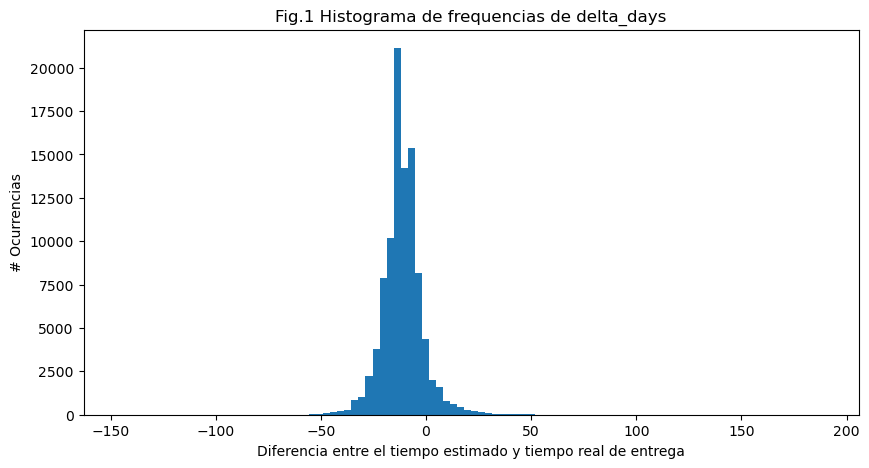

In [46]:
# figura y eje de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# numero de intervalos para conteos
n_bins = 100

# creacion del objeto historgama
n, bins, patches = ax.hist(
    delivered['delta_days'],
    n_bins
    )

ax.set_title('Fig.1 Histograma de frequencias de delta_days')
ax.set_xlabel('Diferencia entre el tiempo estimado y tiempo real de entrega')
ax.set_ylabel('# Ocurrencias')

La gráfica anterior muestra la cantidad de veces que se observaron diferencias de tiempo entre la estimación y la entrega real. Como se aprencia hay pico alrededor del valor -11, porque como sabemos las órdenes tienden a llega antes de tiempo

Además, dicha gráfica está **sesgada a la izquierda**, antes del valor cero, lo que significa que la mayoria de las órdenes llegan antes del tiempo estimado. Los valores extremos  a la derecha indican retrasos, que como se ve pueden superar hasta los 50 días.

En estadística, existe un concepto denominado `regla empírica débil` que nos permite relacionar a la distribución de los datos junto con la media y la desviación estándar. En esencia, nos permite asegurar que aproximadamente 88.88% de los datos, se encontrarán entre el intervalo definido por la media y tres veces la desviación estándar.

Esto se puede constatar empíricamente en nuestro histograma, añadiendo las regiones descritan previamente:

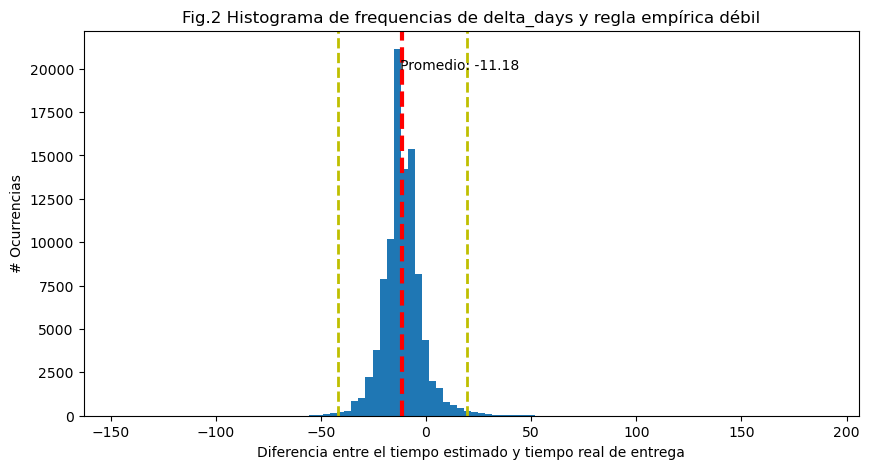

In [65]:
# figura y eje de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# numero de intervalos para conteos
n_bins = 100

# creacion del objeto historgama
n, bins, patches = ax.hist(
    delivered['delta_days'],
    n_bins
    )

ax.set_title('Fig.2 Histograma de frequencias de delta_days y regla empírica débil' )
ax.set_xlabel('Diferencia entre el tiempo estimado y tiempo real de entrega')
ax.set_ylabel('# Ocurrencias')

## Agrega la media y las regiones de la regla empírica débil
## Linea para la media
plt.axvline(
    oilst['delta_days'].mean(),
    color='r',
    linestyle='dashed',
    linewidth=3)

## Linea para la media + 3 veces la desv. estandar
plt.axvline(
    oilst['delta_days'].mean() + 3*oilst['delta_days'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## Linea para la media - 3 veces la desv. estandar
plt.axvline(
    oilst['delta_days'].mean() - 3*oilst['delta_days'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## limites de la figura
min_ylim, max_ylim = plt.ylim()

## Etiquetas
plt.text(
    delivered['delta_days'].mean()*1.1,
    max_ylim*0.9,
    'Promedio: {:.2f}'.format(oilst['delta_days'].mean())
    )

plt.show()

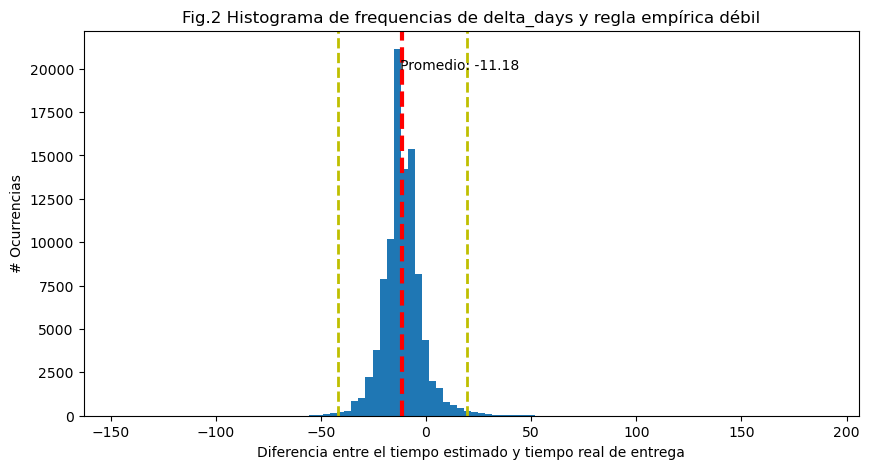

In [66]:
# figura y eje de la figura
fig, ax = plt.subplots(figsize=(10, 5))

# numero de intervalos para conteos
n_bins = 100

# creacion del objeto historgama
n, bins, patches = ax.hist(
    delivered['delta_days'],
    n_bins
    )

ax.set_title('Fig.2 Histograma de frequencias de delta_days y regla empírica débil' )
ax.set_xlabel('Diferencia entre el tiempo estimado y tiempo real de entrega')
ax.set_ylabel('# Ocurrencias')

## Agrega la media y las regiones de la regla empírica débil
## Linea para la media
plt.axvline(
    oilst['delta_days'].mean(),
    color='r',
    linestyle='dashed',
    linewidth=3)

## Linea para la media + 3 veces la desv. estandar
plt.axvline(
    oilst['delta_days'].mean() + 3*oilst['delta_days'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## Linea para la media - 3 veces la desv. estandar
plt.axvline(
    oilst['delta_days'].mean() - 3*oilst['delta_days'].std(),
    color='y',
    linestyle='dashed',
    linewidth=2)

## limites de la figura
min_ylim, max_ylim = plt.ylim()

## Etiquetas
plt.text(
    delivered['delta_days'].mean()*1.1,
    max_ylim*0.9,
    'Promedio: {:.2f}'.format(oilst['delta_days'].mean())
    )

#Generar la imagen .png
plt.savefig('histogram_sales_long_delay.png')

In [49]:
print("La mayoria de los datos se ubican en el intervalo:")

print(
    "(media + 3 desv. std , media - 3 desv. std)= ",'(',
    round(oilst['delta_days'].mean() - 3*oilst['delta_days'].std(),1), ",",
    round(oilst['delta_days'].mean() + 3*oilst['delta_days'].std(),1),")",
    )

La mayoria de los datos se ubican en el intervalo:
(media + 3 desv. std , media - 3 desv. std)=  ( -41.7 , 19.4 )


Una forma alternativa de visualizar lo anterior, es echar mano la **función de distribución acumulativa empírica**. 

Dicha herramienta es una manera de resumir datos y entender cómo se distribuyen los valores en un conjunto de datos, pues esencialmente, para una lista ordenada de números, nos permite entender cuántos de los valores son menores o iguales a un número específico y con ello entender de manera aproximada cuantos de los casos ocurren en la realidad y en que proporción, aproximando la probabilidad de un fenómeno.

Por ejemplo, si tenemos una lista de edades y queremos saber cuántas personas tienen 30 años o menos, 
podemos usar la función empírica de distribución cumulativa. Si hay 50 personas en total y 20 tienen 30 años o menos, entonces la función nos dirá que el 40% de las personas tienen 30 años o menos. Podemos repetir esto para cada edad y obtener una imagen completa de cómo se distribuyen las edades en nuestro conjunto de datos.

En el caso de la variable `delta_days`, la **función de distribución acumulativa empírica** se puede visualizar mediante la función `ecdfplot`. En el **eje X** se tiene el valor de la variable en estudio y en el **eje Y** se encuentra la proporción de casos que corresponden a valores menores o iguales a los del **eje X** .

En Python, se puede construir la función **función de distribución acumulativa empírica** usando las utilidades de Matplotlib `.hist` (https://www.google.com/search?client=safari&rls=en&q=hist+matplotlib&ie=UTF-8&oe=UTF-8) junto con sus parámetros `cumulative=True`, `histtype='step'` y ` density=True`

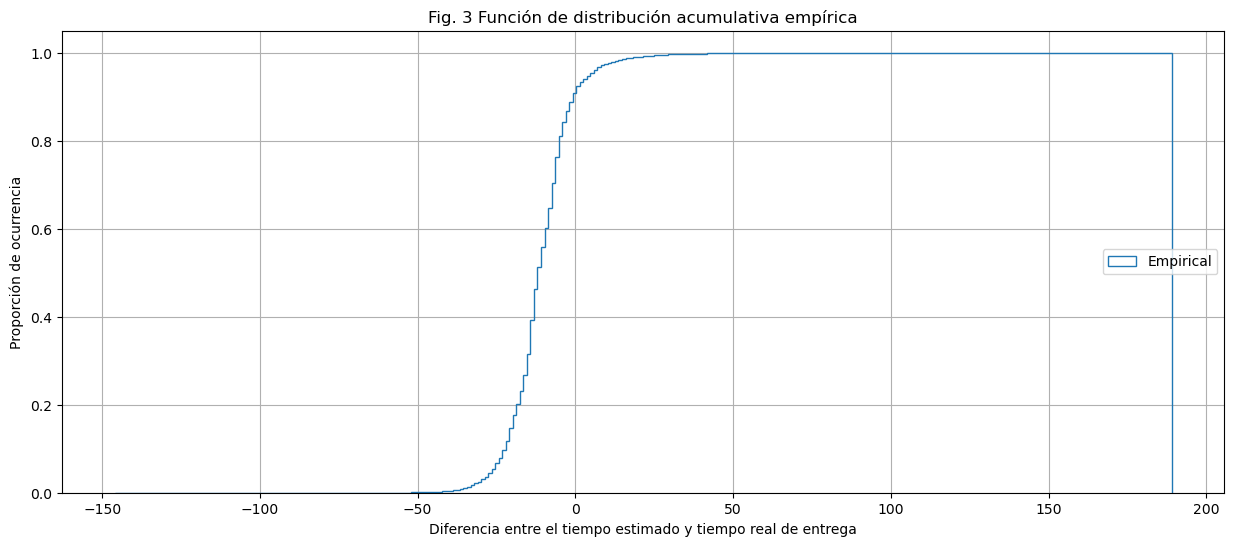

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))

n_bins = 300

# plot the cumulative histogram
n, bins, patches = ax.hist(
    oilst.query("year > 2017")['delta_days'],
    n_bins,
    density=True,
    histtype='step',
    cumulative=True,
    label='Empirical'
    )

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Fig. 3 Función de distribución acumulativa empírica')
ax.set_xlabel('Diferencia entre el tiempo estimado y tiempo real de entrega')
ax.set_ylabel('Proporción de ocurrencia')

plt.show()

En esta gráfica se puede apreciar que casi con más del 90% de probabilidad, las órdenes llegan en tiempo (comparando el valor cero en el eje X vs la proporción de ocurrencias en el eje Y).

Existe un concepto matemático llamada kernel gaussiano que permite aproximar dicha probabilidad y que en Python se calcula con la herramien `gaussian_kde` de la librería Scipy.

A continuación se aproximarán los valores que vemos en el diagrama de la función de distribución acumulativa empírica

In [51]:
# Aproxima los valores de la función de
#  distribución acumulativa empírica
import scipy.stats

# Nota: el metodo .dropna() elimina valores nulos
kde = scipy.stats.gaussian_kde(
    oilst['delta_days'].dropna() 
    )

Ahora estamos en condiciones de aproximar la probabilidad de recibir un pedido antes del tiempo estimado:

In [52]:
# Probabilidad de recibir entre un mes y hasta 
# en cero dias antes de lo estimado
print("Probabilidad: ",kde.integrate_box_1d(-30, 0)*100)

Probabilidad:  89.06667126779072


Del mismo modo, se puede calcular la probabilidad de recibir el pedio con retrazo moderado (entre cero dias de lo estimado y hasta en menos de 3):

In [53]:
# Probabilidad de recibir con un retraso moderado
print("Probabilidad: ",kde.integrate_box_1d(0, 3)*100)

Probabilidad:  2.9958771692560027


In [54]:
# Probabilidad de recibir con un retraso de 3 a 7 días
print("Probabilidad: ",kde.integrate_box_1d(3, 7)*100)

Probabilidad:  1.9719913364654336


In [55]:
# Probabilidad de recibir con un retraso de 3 a 15 días
print("Probabilidad: ",kde.integrate_box_1d(3, 15)*100)

Probabilidad:  4.037441793767195


In [56]:
# Probabilidad de recibir con un retraso grande
print("Probabilidad: ",kde.integrate_box_1d(4, 200)*100)

Probabilidad:  4.957637170732579


**Pregunta:**

* ¿Cuál es la probabilidad de recibir un pedido entre 3 y 7 dias después de lo estimado?

Aproximadamente del 2%

* ¿Cuál es la probabilidad de recibir un pedido entre 3 y 15 dias después de lo estimado?

Aproximadamente del 4%

* ¿Cuál es la probabilidad de recibir un pedido después de 3 dias después de lo estimado? Hint: se puede usar una fecha muy larga como limite superior derecho, por ejemplo 200 días

Aproximadamente del 5%

### 4.7 Análsis de correlación lineal

La correlación lineal es una herramienta que se utiliza para analizar la relación lineal entre varias variables. En esencia, lo que hace es medir cuánto se parecen dos variables y cuánto se influyen mutuamente.

Formalmente, se denomina **Coeficiente de correlación de Pearson** y se calcula como un coeficiente entre dos variables numéricas, que oscila entre entre -1 y 1, donde -1 significa que las dos variables están completamente inversamente relacionadas (si una aumenta, la otra disminuye) y 1 significa que las dos variables están completamente relacionadas (si una aumenta, la otra también lo hace). En el caso cercano a cero, esto significa que no hay correlacion de tipo lineal entre estas

Si queremos detectar que una variable tiene correlación lineal con otra, su coeficiente de correlación debe aproximarse lo más posible a -1 o 1. 

Debemos mencionar que la existencia de correlación lineal entre dos variables no implica que una cause a la otra; por ejemplo, la cantidad de helados que se venden en verano aumenta a la vez que la cantidad de quemaduras en la piel en la misma época, sin que alguna de ellas sea la causa de la otra. Sin embargo la correlación alta es un elemento deseable en cualquier análisis exploratorio para comenzar a indagar como es que un fenómeno cambia ante diversos factores. 



Ahora veremos como cambia la distancia de los domicilios de los clientes a su centro de distribución más cercano (`distance_distribution_center`) con respecto al estatus del tiempo de entrega. Primero, podemos revisar los estadísticos básicos:

In [57]:
delivered.groupby(['delay_status'])['distance_distribution_center'].describe()

,count,mean,std,min,25%,50%,75%,max
delay_status,,,,,,,,
long_delay,5164.0,6415.812481,56385.831066,6.52,41.405,141.95,782.2275,1349721.75
on_time,88644.0,50.509725,29.120090,0.01,25.230,50.62,75.6400,101.00
short_delay,2662.0,2.647070,1.559544,1.00,1.580,2.01,2.9700,7.29


Ahora usaremos el métod `.corr` de pandas sobre las variables numéricas `total_sales`, `total_products`, `distance_distribution_center`y `delta_days`.

In [58]:
delivered[
    ['total_sales', 'total_products', 'distance_distribution_center', 'delta_days']
    ].corr().round(4)

,total_sales,total_products,distance_distribution_center,delta_days
total_sales,1.0000,0.1535,0.0069,-0.0136
total_products,0.1535,1.0000,-0.0024,-0.0320
distance_distribution_center,0.0069,-0.0024,1.0000,0.3312
delta_days,-0.0136,-0.0320,0.3312,1.0000


En esta tabla no se aprecia correlación entre las variables. Repitamos los cálculos pero en el caso de que ordenes entregas, que presentaron retrasos prolongados. 

In [59]:
# Completa el codigo provisto
filter = delivered['delay_status'] == 'long_delay' # filtro para definir ordenes con retraso prolongado

# lista de variables numericas de ventas, productos, retrasos y distancia al centro de distribucion
numerical_variables = ['total_sales', 'total_products', 'delta_days', 'distance_distribution_center']

# calculo de matriz de correlacion
delivered[filter][numerical_variables].corr().round(4)


,total_sales,total_products,delta_days,distance_distribution_center
total_sales,1.0000,0.0756,0.0187,0.0179
total_products,0.0756,1.0000,-0.0179,-0.0035
delta_days,0.0187,-0.0179,1.0000,0.7609
distance_distribution_center,0.0179,-0.0035,0.7609,1.0000


**Preguntas**

* ¿Existe correlación fuerte entre alguna de las variables? De ser el caso, ¿entre cuales?

  Después de aplicar el coeficiente de relación de Pearson, observamos lo siguiente:
  - No hay una fuerte correlación lineal entre el total de ventas y el total de productos.
  - Existe una correlación débil y negativa entre el total de productos y la cantidad de días de  retraso.
  - Hay una correlación moderadamente fuerte y positiva entre la cantidad de días de retraso y la   distancia al centro de distribución.
  - No hay una fuerte correlación lineal entre el total de ventas y la distancia al centro de  distribución.


* ¿Qué es lo que implica lo anterior para el problema de los retrasos prolongados en las entregas a los clientes de Oilst?


  Las observaciones derivadas de la matriz de correlación entre las variables pueden proporcionar algunas pistas importantes sobre el problema de los retrasos prolongados en las entregas a los clientes, con la intención de no minimizar ningún hallazgo, vamos a analizar nuevamente cada una de las relaciones que involucran retrasos:

  - Correlación débil entre total de ventas y retrasos prolongados, esto indica que la magnitud de las ventas no es un factor crítico para predecir los retrasos prolongados.
  - Correlación moderada entre días de retraso y distancia al centro de distribución, que sugiere que la distancia geográfica podría estar relacionada con los retrasos prolongados. Esto podría implicar que las entregas a ubicaciones más lejanas desde el centro de distribución tienen una mayor probabilidad de experimentar retrasos prolongados.
  - Correlación débil entre total de ventas y distancia al centro de distribución, indica que el volumen de ventas no está directamente relacionado con la distancia geográfica al centro de distribución. Esto podría sugerir que la empresa atiende a una amplia gama de ubicaciones, independientemente del volumen de ventas.

  En resumen y en función de los anteriores hallzgos, se pueden considerar algunas implicaciones  para abordar el problema de los retrasos prolongados en las entregas a los clientes:


  1. Enfoque en la gestión de distancias: Viendo que la distancia al centro de distribución parece estar relacionada con los retrasos prolongados, se deben considerar estrategias para optimizar la logística y reducir los tiempos de entrega en ubicaciones más alejadas.

  2. Análisis de la logística de Olist: Estos resultados sugieren que hay otros factores en juego que podrían estar contribuyendo a los retrasos prolongados. Es importante hacer análisis adicionales para identificar y abordar estos factores, como la eficiencia en la gestión de pedidos, la calidad del servicio de transporte o la capacidad de gestión de inventario.

  3. Segmentación de clientes: dependiendo de los resultados de análisis adicionales, se podría considerar segmentar a los clientes según la ubicación geográfica y aplicar estrategias de entrega específicas para las ubicaciones que experimentan retrasos prolongados.

  En general, aunque los resultados no son concretos, si sirven para dirigir esfuerzos de mejora de manera más precisa y a tomar decisiones informadas para abordar el problema de los retrasos prolongados en las entregas a los clientes.


## 5. Entregables

En esta sección los entregables consisten en un script en Python junto con un tabla/imagen en un archivo en formato específico:

A. Script que calcule la proporción que han representado las ventas de órdenes completas de Oilst dentro de los categorías de `delay_status` y a los largo de los trimestres de 2016 a 2018. El resultado de este script deberá ser un tabla denominada `prop_sales_delay_status_by_quarte.csv`.

B. Programa que construya una tabla con la cantidad conteos cuantas órdenes que existieron por cantidad de productos dentro de la orden y el tipo de retraso de las categorías `delay_status`. El resultado de este script deberá ser un tabla denominada `count_orders_basket_size_by_delay_status.csv`.

C. Programa que construya el histograma de frecuencias de la variable `total_sales`, junto con la el promedio intervalos que define la regla empírica débil para encontrar el 88.88% de los datos alrededor del promedio, restringiendo el análisis las órdenes que tienen status completo. El resultado de este script deberá ser una figura denominada `histogram_sales_long_delay.png`.

D. Script que calcula la matriz de correlación entre las variables `total_sales`, `total_products`, `delta_days` y `distance_distribution_center` para órdenes completadas que cuya fecha de entrega sobrepasa los 10 días de la fecha estimada para la entrega.

Para calcular la matriz de correlación cuando 'long_delay' sea mayor a 10, aplicamos un filtro adicional a las filas que cumplan con esa condición antes de calcular la matriz de correlación:

In [60]:
# Aplica el filtro para las órdenes con 'long_delay' mayor a 10
filter = (delivered['delay_status'] == 'long_delay') & (delivered['delta_days'] > 10)

# Lista de variables numéricas de interés
numerical_variables = ['total_sales', 'total_products', 'delta_days', 'distance_distribution_center']

# Calcula la matriz de correlación
delivered[filter][numerical_variables].corr().round(4)

,total_sales,total_products,delta_days,distance_distribution_center
total_sales,1.0000,0.1160,0.0282,0.0276
total_products,0.1160,1.0000,-0.0145,-0.0016
delta_days,0.0282,-0.0145,1.0000,0.8308
distance_distribution_center,0.0276,-0.0016,0.8308,1.0000
